# <a id="phân-tích-dữ-liệu-doanh-số-bán-game-toàn-cầu"></a>Phân Tích Dữ Liệu Doanh Số Bán Game Toàn Cầu

# <a id="notebook-2-phân-tích-câu-hỏi-1-5"></a>Notebook 2: Phân tích Câu hỏi 1-5

## <a id="mục-lục"></a>Mục lục

- [Import thư viện và đọc dữ liệu](#import-thư-viện-và-đọc-dữ-liệu)
- [3. Đặt ra câu hỏi ý nghĩa cần trả lời](#3-đặt-ra-câu-hỏi-ý-nghĩa-cần-trả-lời)
- [4. Phân tích dữ liệu để trả lời cho từng câu hỏi](#4-phân-tích-dữ-liệu-để-trả-lời-cho-từng-câu-hỏi)
    - [Kết luận Câu 1](#kết-luận-câu-1)
  - [Câu 2: Doanh số game thay đổi như thế nào theo vòng đời của nền tảng?](#câu-2-doanh-số-game-thay-đổi-như-thế-nào-theo-vòng-đời-của-nền-tảng)
    - [Kết luận Câu 2](#kết-luận-câu-2)
  - [Câu 3: Thể loại game nào đang tăng trưởng và thể loại nào đang suy giảm theo thời gian?](#câu-3-thể-loại-game-nào-đang-tăng-trưởng-và-thể-loại-nào-đang-suy-giảm-theo-thời-gian)
    - [Kết luận Câu 3](#kết-luận-câu-3)
  - [Câu 4: Publisher nào có tỷ lệ tạo ra "hit game" cao nhất?](#câu-4-publisher-nào-có-tỷ-lệ-tạo-ra-hit-game-cao-nhất)
    - [Kết luận Câu 4](#kết-luận-câu-4)
  - [Câu 5: Có sự khác biệt về hiệu suất doanh số giữa các nhà phát hành lớn và nhỏ không?](#câu-5-có-sự-khác-biệt-về-hiệu-suất-doanh-số-giữa-các-nhà-phát-hành-lớn-và-nhỏ-không)
    - [Kết luận Câu 5](#kết-luận-câu-5)

## <a id="import-thư-viện-và-đọc-dữ-liệu"></a>Import thư viện và đọc dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho seaborn
sns.set_theme(style='whitegrid')

# Thiết lập hiển thị đầy đủ các cột
pd.set_option('display.max_columns', None)

# Thiết lập kích thước mặc định cho các biểu đồ
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

# Thiết lập font hỗ trợ tiếng Việt (nếu cần)
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

import warnings
warnings.filterwarnings('ignore')

# Đọc dữ liệu
df = pd.read_csv('../data/vgsales.csv')
print(f"Đã đọc {len(df):,} records")
df.head()

Đã đọc 16,598 records


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## <a id="3-đặt-ra-câu-hỏi-ý-nghĩa-cần-trả-lời"></a>3. Đặt ra câu hỏi ý nghĩa cần trả lời

**Câu 1:** Sự kết hợp Platform-Genre nào mang lại doanh số trung bình cao nhất? Nhà phát triển nên chọn nền tảng nào cho thể loại game của mình?

**Câu 2:** Doanh số game thay đổi như thế nào theo vòng đời của nền tảng?

**Câu 3:** Thể loại game nào đang tăng trưởng và thể loại nào đang suy giảm theo thời gian?

**Câu 4:** Publisher nào có tỷ lệ tạo ra "hit game" cao nhất?

**Câu 5:** Có sự khác biệt về hiệu suất doanh số giữa các nhà phát hành lớn và nhỏ không?

**Câu 6 (Modeling):** Có thể dự đoán doanh số của game dựa trên các thuộc tính không? *(Xem Notebook 3)*

## <a id="4-phân-tích-dữ-liệu-để-trả-lời-cho-từng-câu-hỏi"></a>4. Phân tích dữ liệu để trả lời cho từng câu hỏi

### <a id="câu-1-sự-kết-hợp-platform-genre-nào-mang-lại-doanh-số-trung-bình-cao-nhất"></a>Câu 1: Sự kết hợp Platform-Genre nào mang lại doanh số trung bình cao nhất?

#### <a id="động-lực-và-lợi-ích"></a>Động lực và lợi ích:
Giúp nhà phát triển chọn **nền tảng phù hợp nhất** cho thể loại game đang làm, tối ưu hóa cơ hội thành công thương mại.

#### <a id="các-bước-thực-hiện"></a>Các bước thực hiện:

**Bước 1: Chuẩn bị dữ liệu**
- Lọc lấy **top 8 platform phổ biến nhất** (có nhiều game nhất) để đảm bảo đủ dữ liệu phân tích và heatmap dễ đọc
- Tính doanh số trung bình (`mean`) và số lượng game (`count`) cho mỗi cặp Platform-Genre bằng `groupby().agg()`
- Lọc chỉ giữ lại các cặp có **>= 10 games** để đảm bảo kết quả có ý nghĩa thống kê (tránh bias từ mẫu nhỏ)

**Bước 2: Xác định Top 10 cặp kết hợp tốt nhất**
- Sắp xếp theo doanh số trung bình giảm dần bằng `nlargest(10, 'Avg_Sales')`
- Hiển thị bảng kết quả với Platform, Genre, doanh số TB và số lượng game

**Bước 3: Trực quan hóa bằng Heatmap**
- Tạo pivot table với Platform là hàng, Genre là cột, giá trị là doanh số trung bình
- Vẽ **heatmap** với `sns.heatmap()` để dễ dàng nhìn thấy cặp nào có doanh số cao (màu đậm) hay thấp (màu nhạt)
- Từ heatmap, đưa ra **khuyến nghị cụ thể** cho nhà phát triển về việc chọn platform phù hợp với thể loại game

In [2]:
# Bước 1: Tính doanh số trung bình theo cặp Platform-Genre
# Chỉ lấy top 8 platform phổ biến để heatmap dễ đọc
top_platforms = df['Platform'].value_counts().head(8).index.tolist()
df_filtered = df[df['Platform'].isin(top_platforms)]

# Tính doanh số trung bình và số lượng game cho mỗi cặp
platform_genre_stats = df_filtered.groupby(['Platform', 'Genre']).agg({
    'Global_Sales': ['mean', 'count']
}).round(3)
platform_genre_stats.columns = ['Avg_Sales', 'Game_Count']
platform_genre_stats = platform_genre_stats.reset_index()

# Lọc chỉ những cặp có ít nhất 10 games (đảm bảo ý nghĩa thống kê)
platform_genre_stats = platform_genre_stats[platform_genre_stats['Game_Count'] >= 10]

# Bước 2: Top 10 cặp Platform-Genre tốt nhất
top_10_combos = platform_genre_stats.nlargest(10, 'Avg_Sales')
print("=" * 70)
print("TOP 10 CẶP PLATFORM-GENRE CÓ DOANH SỐ TRUNG BÌNH CAO NHẤT")
print("(Chỉ tính các cặp có >= 10 games)")
print("=" * 70)
print(top_10_combos.to_string(index=False))

TOP 10 CẶP PLATFORM-GENRE CÓ DOANH SỐ TRUNG BÌNH CAO NHẤT
(Chỉ tính các cặp có >= 10 games)
Platform        Genre  Avg_Sales  Game_Count
     Wii     Platform      1.564          58
    X360      Shooter      1.372         203
     PS3      Shooter      1.257         156
     Wii       Sports      1.119         261
      PS     Platform      1.003          64
    X360 Role-Playing      0.947          76
      DS     Platform      0.842          92
     PS3     Platform      0.820          37
     PS3       Action      0.810         380
      PS       Action      0.809         157


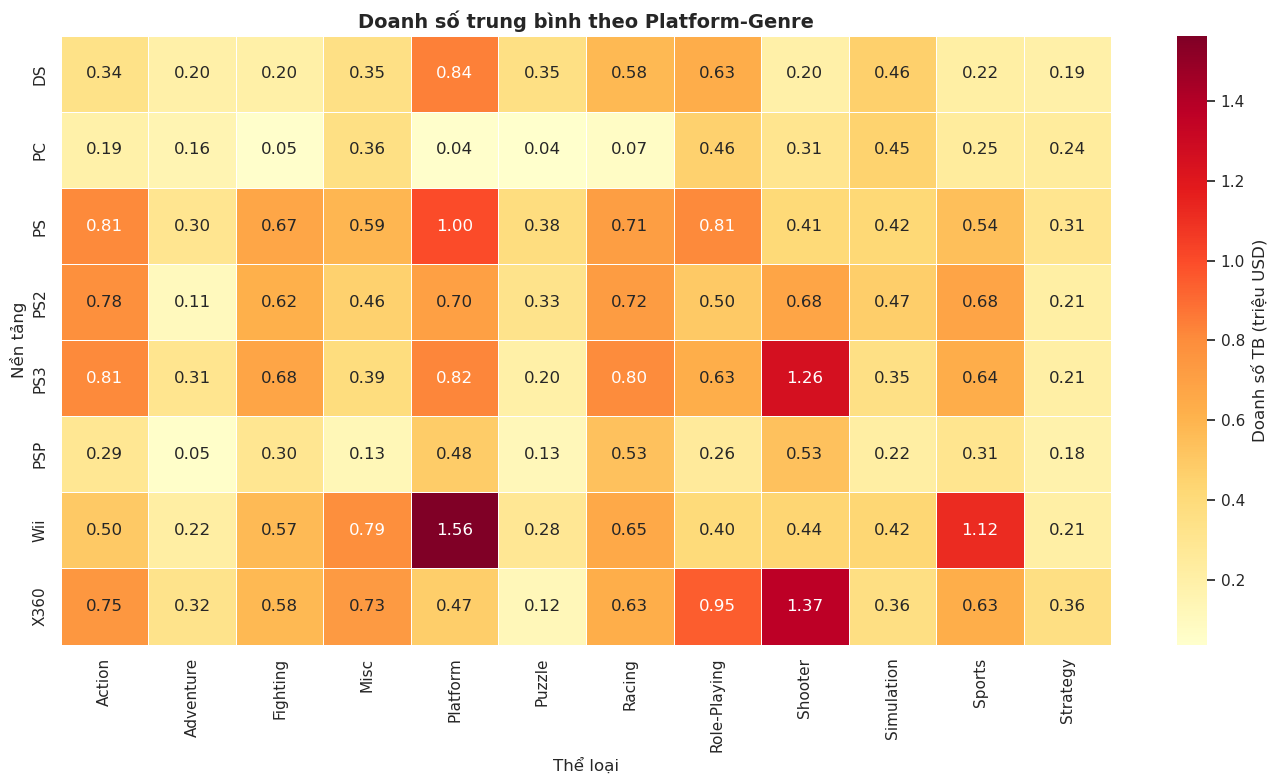

In [3]:
# Bước 3: Heatmap trực quan hóa
# Tạo pivot table cho heatmap
pivot_avg_sales = df_filtered.groupby(['Platform', 'Genre'])['Global_Sales'].mean().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_avg_sales, annot=True, fmt='.2f', cmap='YlOrRd',
            linewidths=0.5, cbar_kws={'label': 'Doanh số TB (triệu USD)'})
plt.title('Doanh số trung bình theo Platform-Genre', fontsize=14, fontweight='bold')
plt.xlabel('Thể loại', fontsize=12)
plt.ylabel('Nền tảng', fontsize=12)
plt.tight_layout()
plt.show()

#### <a id="kết-luận-câu-1"></a>Kết luận Câu 1:

Phân tích cho thấy sự kết hợp giữa nền tảng và thể loại game có ảnh hưởng đáng kể đến doanh số trung bình. Cụ thể:
- Nền tảng Wii kết hợp với thể loại Platform và Sports mang lại doanh số trung bình cao nhất trong toàn bộ dataset, điều này phản ánh chiến lược thành công của Nintendo khi nhắm đến đối tượng gia đình với các game casual dễ tiếp cận như Wii Sports và Mario.
- Các nền tảng Xbox 360 và PS3 lại phát huy thế mạnh với thể loại Shooter, nơi các dòng game như Call of Duty và Halo đã tạo ra doanh số ấn tượng nhờ vào cộng đồng game thủ trung thành.

Do vậy, các nhà phát triển game nên cân nhắc kỹ lưỡng việc lựa chọn nền tảng phù hợp với thể loại game đang phát triển thay vì cố gắng phát hành đa nền tảng ngay từ đầu:

- Nếu đang phát triển game thể thao hoặc platformer, ưu tiên các nền tảng của Nintendo sẽ mang lại cơ hội thành công cao hơn.
- Nếu phát triển game bắn súng hoặc hành động, nền tảng Xbox và PlayStation sẽ là lựa chọn tối ưu hơn do đặc điểm demographics của người chơi trên các hệ máy này.

### <a id="câu-2-doanh-số-game-thay-đổi-như-thế-nào-theo-vòng-đời-của-nền-tảng"></a>Câu 2: Doanh số game thay đổi như thế nào theo vòng đời của nền tảng?

#### <a id="động-lực-và-lợi-ích"></a>Động lực và lợi ích:
Giúp **publisher** xác định thời điểm phát hành tối ưu - phát hành game vào giai đoạn nào của nền tảng (đầu/giữa/cuối) để đạt doanh số cao nhất.

#### <a id="các-bước-thực-hiện"></a>Các bước thực hiện:

**Bước 1: Xác định vòng đời các platform**
- Loại bỏ các dòng có giá trị `Year` bị thiếu (NaN) bằng `dropna(subset=['Year'])` để đảm bảo tính chính xác
- Với mỗi platform, tính: `Start_Year` (năm game đầu tiên), `End_Year` (năm game cuối cùng), `Game_Count` (tổng số game) bằng `groupby('Platform')['Year'].agg(['min', 'max', 'count'])`
- Tính `Lifespan` = End_Year - Start_Year + 1 (số năm hoạt động của platform)
- Lọc chỉ giữ **platform chính** có ≥ 100 games và ≥ 5 năm hoạt động để đảm bảo đủ dữ liệu phân tích có ý nghĩa

**Bước 2: Phân loại game vào 3 giai đoạn vòng đời**
- Chia vòng đời mỗi platform thành **3 giai đoạn bằng nhau**: Đầu (Early), Giữa (Mid), Cuối (Late)
- Tạo hàm `get_lifecycle_stage()` để xác định game thuộc giai đoạn nào dựa trên: `relative_year = Year - Start_Year`, sau đó so với `stage_length = Lifespan / 3`
- Áp dụng hàm này cho tất cả games của các platform chính bằng `df.apply()`

**Bước 3: Tính toán và trực quan hóa**
- Tính doanh số trung bình (`mean`), số games (`count`), tổng doanh số (`sum`) theo từng giai đoạn bằng `groupby('Lifecycle_Stage').agg()`
- Vẽ **2 bar charts** cạnh nhau: (1) Doanh số TB theo giai đoạn, (2) Số lượng games theo giai đoạn
- So sánh kết quả để xác định **giai đoạn nào mang lại doanh số tốt nhất** và đưa ra khuyến nghị cho publisher về thời điểm phát hành

In [4]:
# Bước 1 & 2: Xác định vòng đời và chia giai đoạn cho các platform chính
# Chỉ phân tích các platform có đủ dữ liệu (>= 5 năm hoạt động)

df_with_year = df.dropna(subset=['Year']).copy()
df_with_year['Year'] = df_with_year['Year'].astype(int)

# Xác định vòng đời từng platform
platform_lifecycle = df_with_year.groupby('Platform')['Year'].agg(['min', 'max', 'count'])
platform_lifecycle.columns = ['Start_Year', 'End_Year', 'Game_Count']
platform_lifecycle['Lifespan'] = platform_lifecycle['End_Year'] - platform_lifecycle['Start_Year'] + 1

# Lọc platform có >= 100 games và >= 5 năm hoạt động
major_platforms = platform_lifecycle[(platform_lifecycle['Game_Count'] >= 100) &
                                      (platform_lifecycle['Lifespan'] >= 5)].index.tolist()

print("=" * 60)
print("VÒNG ĐỜI CÁC NỀN TẢNG CHÍNH")
print("=" * 60)
print(platform_lifecycle.loc[major_platforms].sort_values('Start_Year'))

VÒNG ĐỜI CÁC NỀN TẢNG CHÍNH
          Start_Year  End_Year  Game_Count  Lifespan
Platform                                            
2600            1980      1989         116        10
DS              1985      2020        2133        36
PC              1985      2016         943        32
SNES            1990      1999         239        10
SAT             1994      1999         173         6
PS              1994      2003        1189        10
N64             1996      2002         316         7
PS2             2000      2011        2127        12
XB              2000      2008         803         9
GBA             2000      2007         811         8
GC              2001      2007         542         7
PSP             2004      2015        1197        12
X360            2005      2016        1235        12
Wii             2006      2015        1290        10
PS3             2006      2016        1304        11
PSV             2011      2017         412         7
3DS             20

In [5]:
# Bước 3: Phân loại game vào giai đoạn vòng đời và tính doanh số TB

def get_lifecycle_stage(row, lifecycle_df):
    """Xác định game thuộc giai đoạn nào của vòng đời platform"""
    platform = row['Platform']
    year = row['Year']

    if platform not in lifecycle_df.index:
        return None

    start = lifecycle_df.loc[platform, 'Start_Year']
    end = lifecycle_df.loc[platform, 'End_Year']
    lifespan = end - start + 1

    # Chia thành 3 giai đoạn bằng nhau
    stage_length = lifespan / 3
    relative_year = year - start

    if relative_year < stage_length:
        return 'Đầu (Early)'
    elif relative_year < stage_length * 2:
        return 'Giữa (Mid)'
    else:
        return 'Cuối (Late)'

# Áp dụng cho các platform chính
df_major = df_with_year[df_with_year['Platform'].isin(major_platforms)].copy()
df_major['Lifecycle_Stage'] = df_major.apply(lambda x: get_lifecycle_stage(x, platform_lifecycle), axis=1)

# Tính doanh số TB theo giai đoạn
stage_sales = df_major.groupby('Lifecycle_Stage')['Global_Sales'].agg(['mean', 'count', 'sum']).round(3)
stage_sales.columns = ['Doanh số TB', 'Số games', 'Tổng doanh số']
stage_order = ['Đầu (Early)', 'Giữa (Mid)', 'Cuối (Late)']
stage_sales = stage_sales.reindex(stage_order)

print("=" * 60)
print("DOANH SỐ TRUNG BÌNH THEO GIAI ĐOẠN VÒNG ĐỜI PLATFORM")
print("=" * 60)
print(stage_sales)

DOANH SỐ TRUNG BÌNH THEO GIAI ĐOẠN VÒNG ĐỜI PLATFORM
                 Doanh số TB  Số games  Tổng doanh số
Lifecycle_Stage                                      
Đầu (Early)            0.656      5096        3343.88
Giữa (Mid)             0.513      7635        3916.94
Cuối (Late)            0.281      3078         863.60


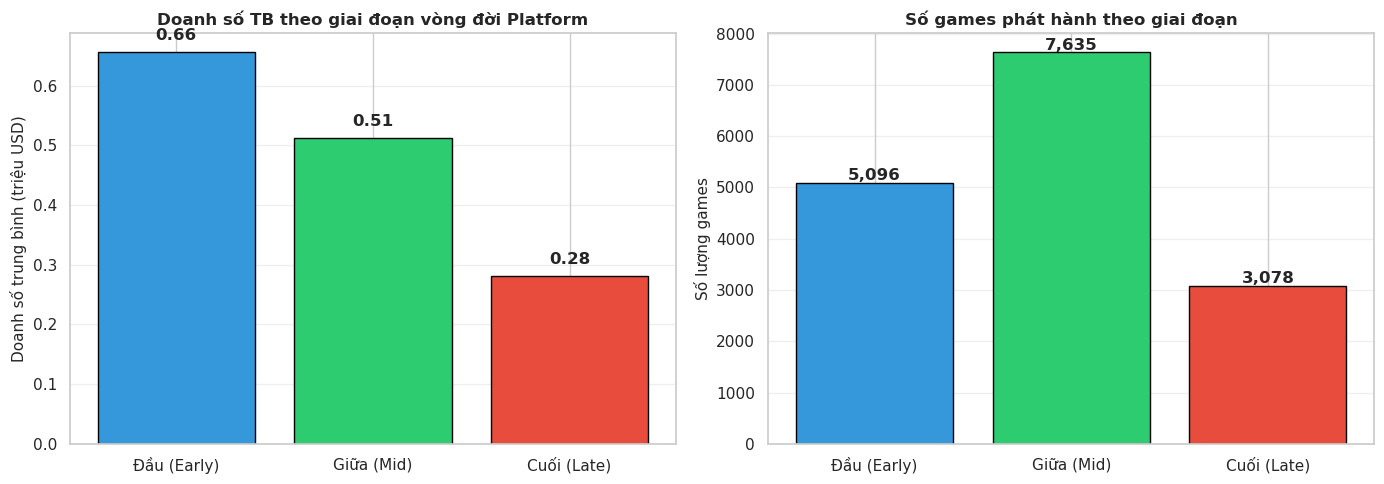

In [6]:
# Visualization: Bar chart doanh số TB theo giai đoạn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['#3498db', '#2ecc71', '#e74c3c']

# Chart 1: Doanh số trung bình
axes[0].bar(stage_order, stage_sales['Doanh số TB'], color=colors, edgecolor='black')
axes[0].set_ylabel('Doanh số trung bình (triệu USD)', fontsize=11)
axes[0].set_title('Doanh số TB theo giai đoạn vòng đời Platform', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(stage_sales['Doanh số TB']):
    axes[0].text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

# Chart 2: Số lượng games
axes[1].bar(stage_order, stage_sales['Số games'], color=colors, edgecolor='black')
axes[1].set_ylabel('Số lượng games', fontsize=11)
axes[1].set_title('Số games phát hành theo giai đoạn', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(stage_sales['Số games']):
    axes[1].text(i, v + 50, f'{int(v):,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

#### <a id="kết-luận-câu-2"></a>Kết luận Câu 2:

Kết quả phân tích cho thấy thời điểm phát hành game trong vòng đời của một nền tảng có tác động rõ rệt đến doanh số:
- Giai đoạn đầu của vòng đời platform thường mang lại doanh số trung bình cao nhất cho mỗi game, nguyên nhân chính là do lượng game cạnh tranh còn ít và người dùng mới mua máy có xu hướng mua nhiều game để trải nghiệm nền tảng mới.
- Giai đoạn giữa tuy có số lượng game phát hành nhiều nhất do thị trường đã chín muồi, nhưng doanh số trung bình mỗi game lại thấp hơn vì sự cạnh tranh gay gắt giữa các tựa game.
- Giai đoạn cuối là thời điểm khó khăn nhất vì người chơi đã bắt đầu chuyển sang thế hệ console mới.

Dựa trên phát hiện này, các publisher nên ưu tiên phát hành các tựa game quan trọng vào giai đoạn đầu đến giữa của vòng đời platform để tối đa hóa doanh số. Đặc biệt, các game launch title hoặc game phát hành trong năm đầu tiên của một nền tảng thường thường được nhiều người chú ý hơn vì lúc đó nền tảng còn rất ít game. Ngược lại, nên tránh đầu tư lớn vào các tựa game phát hành cuối vòng đời platform trừ khi đó là các game lâu đời có fanbase trung thành sẵn sàng mua game bất kể thời điểm.

### <a id="câu-3-thể-loại-game-nào-đang-tăng-trưởng-và-thể-loại-nào-đang-suy-giảm-theo-thời-gian"></a>Câu 3: Thể loại game nào đang tăng trưởng và thể loại nào đang suy giảm theo thời gian?

#### <a id="động-lực-và-lợi-ích"></a>Động lực và lợi ích:
Giúp **nhà phát triển** quyết định đầu tư vào thể loại nào trong tương lai - theo đuổi xu hướng tăng trưởng hay tránh thể loại đang suy giảm.

#### <a id="các-bước-thực-hiện"></a>Các bước thực hiện:

**Bước 1: Tính thị phần của từng Genre theo năm**
- Lọc dữ liệu trong khoảng **1995-2015** (giai đoạn có đủ dữ liệu, loại bỏ năm quá cũ hoặc quá mới thiếu dữ liệu)
- Tính tổng doanh số theo từng cặp (Year, Genre) bằng `groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()`
- Chuyển đổi từ doanh số tuyệt đối sang **thị phần %** bằng cách chia mỗi dòng cho tổng dòng đó: `df.div(df.sum(axis=1), axis=0) * 100`

**Bước 2: Xác định xu hướng tăng/giảm**
- Chia dữ liệu thành 2 giai đoạn: **Đầu (1995-2000)** và **Cuối (2010-2015)**
- Tính thị phần trung bình của mỗi Genre trong mỗi giai đoạn bằng `df.loc[1995:2000].mean()` và `df.loc[2010:2015].mean()`
- Tính **mức thay đổi** = Thị phần cuối - Thị phần đầu
- Xác định Genre có thay đổi **tích cực (tăng trưởng)** và **tiêu cực (suy giảm)** bằng `idxmax()` và `idxmin()`

**Bước 3: Trực quan hóa xu hướng**
- Vẽ **line chart** với trục X là năm, trục Y là thị phần, mỗi đường là một Genre (top 6 genres) để thấy xu hướng theo thời gian
- Vẽ **bar chart ngang** với màu xanh cho tăng trưởng, màu đỏ cho suy giảm để dễ so sánh mức thay đổi giữa các thể loại
- Đưa ra **khuyến nghị cụ thể** cho nhà phát triển về việc nên đầu tư vào thể loại nào

In [7]:
# Bước 1: Tính thị phần của từng Genre theo năm
# Chỉ lấy giai đoạn có đủ dữ liệu (1995-2015)

df_year_clean = df.dropna(subset=['Year']).copy()
df_year_clean['Year'] = df_year_clean['Year'].astype(int)
df_year_clean = df_year_clean[(df_year_clean['Year'] >= 1995) & (df_year_clean['Year'] <= 2015)]

# Tính doanh số theo Genre-Year
genre_year_sales = df_year_clean.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack(fill_value=0)

# Chuyển thành % thị phần mỗi năm
genre_year_share = genre_year_sales.div(genre_year_sales.sum(axis=1), axis=0) * 100

print("THỊ PHẦN (%) CỦA TỪNG THỂ LOẠI THEO NĂM")
print("=" * 80)
print(genre_year_share.round(1).tail(10))  # Hiển thị 10 năm gần nhất

THỊ PHẦN (%) CỦA TỪNG THỂ LOẠI THEO NĂM
Genre  Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Year                                                                 
2006     12.8        2.2       4.3  12.9       9.6     2.1     6.5   
2007     17.4        4.0       2.9  15.1       5.8     3.9     6.4   
2008     20.1        3.7       5.2  12.8       5.3     2.3    10.4   
2009     20.9        3.1       4.8  11.5       6.2     3.0     5.1   
2010     19.6        2.8       2.5  16.1       5.3     1.9     5.8   
2011     23.1        3.1       4.4  10.9       5.4     1.0     6.8   
2012     33.6        1.6       2.6   6.3       5.1     0.5     4.0   
2013     34.0        1.8       2.0   7.0       6.8     0.3     3.5   
2014     29.4        1.8       4.8   7.0       2.6     0.4     5.0   
2015     26.7        3.0       2.9   4.4       2.3     0.3     3.0   

Genre  Role-Playing  Shooter  Simulation  Sports  Strategy  
Year                                                      

In [8]:
# Bước 2: Tính xu hướng - So sánh giai đoạn đầu (1995-2000) vs cuối (2010-2015)
early_period = genre_year_share.loc[1995:2000].mean()
late_period = genre_year_share.loc[2010:2015].mean()

trend_df = pd.DataFrame({
    'Giai đoạn đầu (%)': early_period,
    'Giai đoạn cuối (%)': late_period,
    'Thay đổi (%)': late_period - early_period
}).round(2)

trend_df = trend_df.sort_values('Thay đổi (%)', ascending=False)

print("=" * 60)
print("XU HƯỚNG THAY ĐỔI THỊ PHẦN CÁC THỂ LOẠI")
print("(So sánh 1995-2000 vs 2010-2015)")
print("=" * 60)
print(trend_df)

# Xác định thể loại tăng/giảm mạnh nhất
growing = trend_df['Thay đổi (%)'].idxmax()
declining = trend_df['Thay đổi (%)'].idxmin()
print(f"\n TĂNG mạnh nhất: {growing} (+{trend_df.loc[growing, 'Thay đổi (%)']:.1f}%)")
print(f" GIẢM mạnh nhất: {declining} ({trend_df.loc[declining, 'Thay đổi (%)']:.1f}%)")

XU HƯỚNG THAY ĐỔI THỊ PHẦN CÁC THỂ LOẠI
(So sánh 1995-2000 vs 2010-2015)
              Giai đoạn đầu (%)  Giai đoạn cuối (%)  Thay đổi (%)
Genre                                                            
Action                    11.91               27.72         15.82
Shooter                    5.21               18.97         13.76
Misc                       6.01                8.62          2.61
Adventure                  2.24                2.36          0.12
Sports                    13.59               12.63         -0.96
Simulation                 4.04                2.74         -1.30
Puzzle                     2.15                0.72         -1.43
Role-Playing              15.67               12.47         -3.19
Strategy                   5.14                1.28         -3.86
Fighting                   9.97                3.20         -6.77
Platform                  11.98                4.60         -7.38
Racing                    12.10                4.68         -7.42

 T

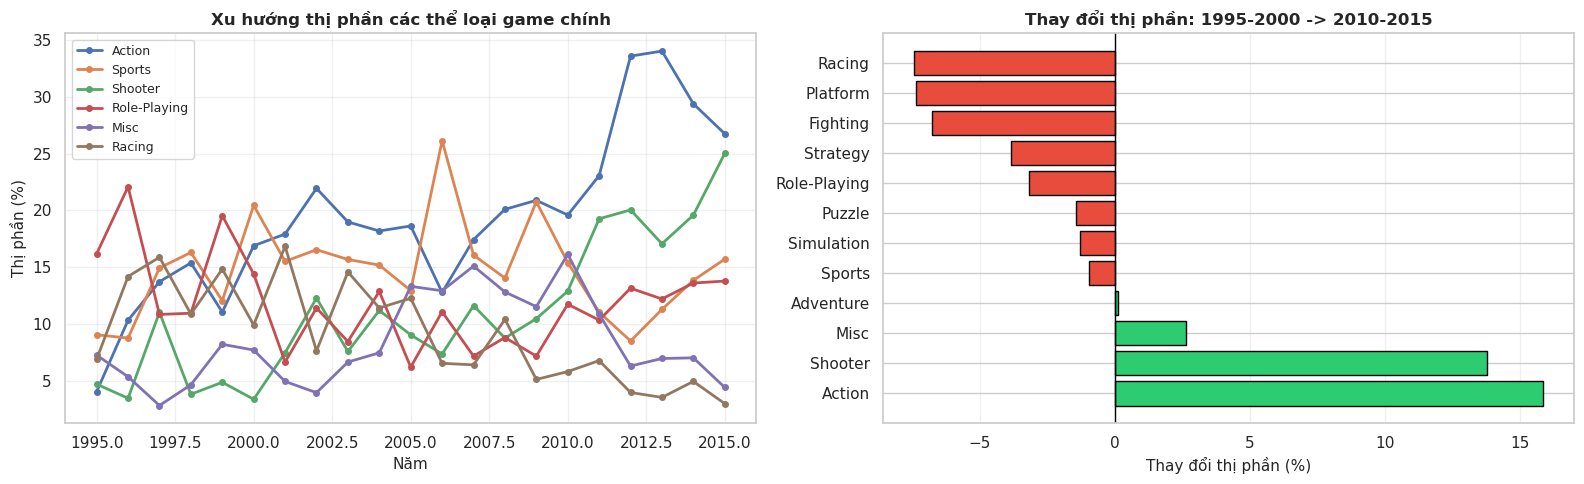

In [9]:
# Bước 3: Visualization - Line chart xu hướng top genres
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Chart 1: Line chart xu hướng theo thời gian (top 6 genres)
top_genres = genre_year_sales.sum().nlargest(6).index
for genre in top_genres:
    axes[0].plot(genre_year_share.index, genre_year_share[genre], marker='o', label=genre, linewidth=2, markersize=4)

axes[0].set_xlabel('Năm', fontsize=11)
axes[0].set_ylabel('Thị phần (%)', fontsize=11)
axes[0].set_title('Xu hướng thị phần các thể loại game chính', fontsize=12, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=9)
axes[0].grid(alpha=0.3)

# Chart 2: Bar chart thay đổi thị phần
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in trend_df['Thay đổi (%)']]
axes[1].barh(trend_df.index, trend_df['Thay đổi (%)'], color=colors, edgecolor='black')
axes[1].axvline(x=0, color='black', linewidth=1)
axes[1].set_xlabel('Thay đổi thị phần (%)', fontsize=11)
axes[1].set_title('Thay đổi thị phần: 1995-2000 -> 2010-2015', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

#### <a id="kết-luận-câu-3"></a>Kết luận Câu 3:

Xu hướng thị phần các thể loại game đã có sự thay đổi đáng kể trong giai đoạn 1995-2015:
- Thể loại **Shooter** đã trải qua giai đoạn tăng trưởng mạnh mẽ nhất, từ chỉ khoảng 5% thị phần vào cuối những năm 90 lên gần 19% vào đầu những năm 2010, chủ yếu nhờ sự thành công vang dội của các game lâu đời như Call of Duty và Battlefield đã định hình lại thói quen chơi game của người dùng.
- Thể loại **Action** cũng có xu hướng tăng trưởng tích cực và duy trì vị thế là một trong những thể loại phổ biến nhất.
- Các thể loại từng thống trị thị trường như **Platform** và **Racing** đã giảm thị phần đáng kể, phản ánh sự thay đổi trong sở thích của game thủ từ các game casual truyền thống sang các trải nghiệm immersive và competitive hơn.

Đối với các nhà phát triển đang cân nhắc đầu tư vào dự án mới, xu hướng này cho thấy thể loại Shooter và Action vẫn là lựa chọn an toàn với nhu cầu thị trường ổn định. Tuy nhiên, điều này cũng đồng nghĩa với sự cạnh tranh khốc liệt trong các thể loại này, đòi hỏi chất lượng sản phẩm phải thực sự nổi bật để thành công.

Với các thể loại đang suy giảm như Platform hay Racing, vẫn có cơ hội cho các game chất lượng cao nhưng cần có chiến lược rõ ràng, tập trung vào một nhóm người chơi nhất định hoặc kết hợp sáng tạo với các yếu tố từ thể loại khác để thu hút người chơi.

### <a id="câu-4-publisher-nào-có-tỷ-lệ-tạo-ra-hit-game-cao-nhất"></a>Câu 4: Publisher nào có tỷ lệ tạo ra "hit game" cao nhất?

#### <a id="động-lực-và-lợi-ích"></a>Động lực và lợi ích:
Giúp **nhà đầu tư** và **developer** đánh giá publisher nào có khả năng biến game thành hit (doanh số cao) tốt nhất, từ đó quyết định hợp tác với ai.

#### <a id="các-bước-thực-hiện"></a>Các bước thực hiện:

**Bước 1: Định nghĩa "hit game"**
- Xác định ngưỡng doanh số để được coi là "hit game" - sử dụng **percentile 75** (top 25% games có doanh số cao nhất) làm ngưỡng
- Tạo cột nhị phân `Is_Hit` = 1 nếu `Global_Sales >= ngưỡng`, = 0 nếu ngược lại

**Bước 2: Tính tỷ lệ hit cho mỗi Publisher**
- Lọc chỉ các Publisher có **≥ 50 games** phát hành để đảm bảo mẫu đủ lớn có ý nghĩa thống kê
- Với mỗi Publisher, tính: `Hit_Rate = Số hit games / Tổng số games * 100%`
- Sắp xếp theo Hit_Rate giảm dần bằng `sort_values()`

**Bước 3: Trực quan hóa và so sánh**
- Vẽ **bar chart** top 15 Publishers có tỷ lệ hit cao nhất
- So sánh với số lượng games để xem Publisher nào vừa có chất lượng (hit rate cao) vừa có số lượng (nhiều games)

In [10]:
# Bước 1: Định nghĩa "hit game" - Top 25% doanh số
hit_threshold = df['Global_Sales'].quantile(0.75)
df['Is_Hit'] = (df['Global_Sales'] >= hit_threshold).astype(int)

print(f"Ngưỡng 'Hit Game': >= {hit_threshold:.2f} triệu USD (Percentile 75)")
print(f"Tổng số hit games: {df['Is_Hit'].sum():,} / {len(df):,} ({df['Is_Hit'].mean()*100:.1f}%)")

Ngưỡng 'Hit Game': >= 0.47 triệu USD (Percentile 75)
Tổng số hit games: 4,224 / 16,598 (25.4%)


In [11]:
# Bước 2: Tính tỷ lệ hit cho mỗi Publisher (≥ 50 games)
publisher_stats = df.groupby('Publisher').agg({
    'Is_Hit': ['sum', 'count'],
    'Global_Sales': 'sum'
}).round(2)
publisher_stats.columns = ['Hit_Count', 'Total_Games', 'Total_Sales']
publisher_stats['Hit_Rate'] = (publisher_stats['Hit_Count'] / publisher_stats['Total_Games'] * 100).round(1)

# Lọc publisher có >= 50 games
publisher_stats = publisher_stats[publisher_stats['Total_Games'] >= 50]
publisher_stats = publisher_stats.sort_values('Hit_Rate', ascending=False)

print("\n" + "=" * 70)
print("TOP 15 PUBLISHERS CÓ TỶ LỆ HIT CAO NHẤT (≥ 50 games)")
print("=" * 70)
print(publisher_stats.head(15))


TOP 15 PUBLISHERS CÓ TỶ LỆ HIT CAO NHẤT (≥ 50 games)
                                        Hit_Count  Total_Games  Total_Sales  \
Publisher                                                                     
SquareSoft                                     34           52        57.65   
Nintendo                                      456          703      1786.56   
Bethesda Softworks                             38           71        82.14   
LucasArts                                      48           90        87.34   
Electronic Arts                               692         1351      1110.32   
Microsoft Game Studios                         86          189       245.79   
Warner Bros. Interactive Entertainment        102          232       153.89   
Disney Interactive Studios                     90          218       119.96   
Square Enix                                    96          233       145.18   
Sony Computer Entertainment                   280          683       607.50  

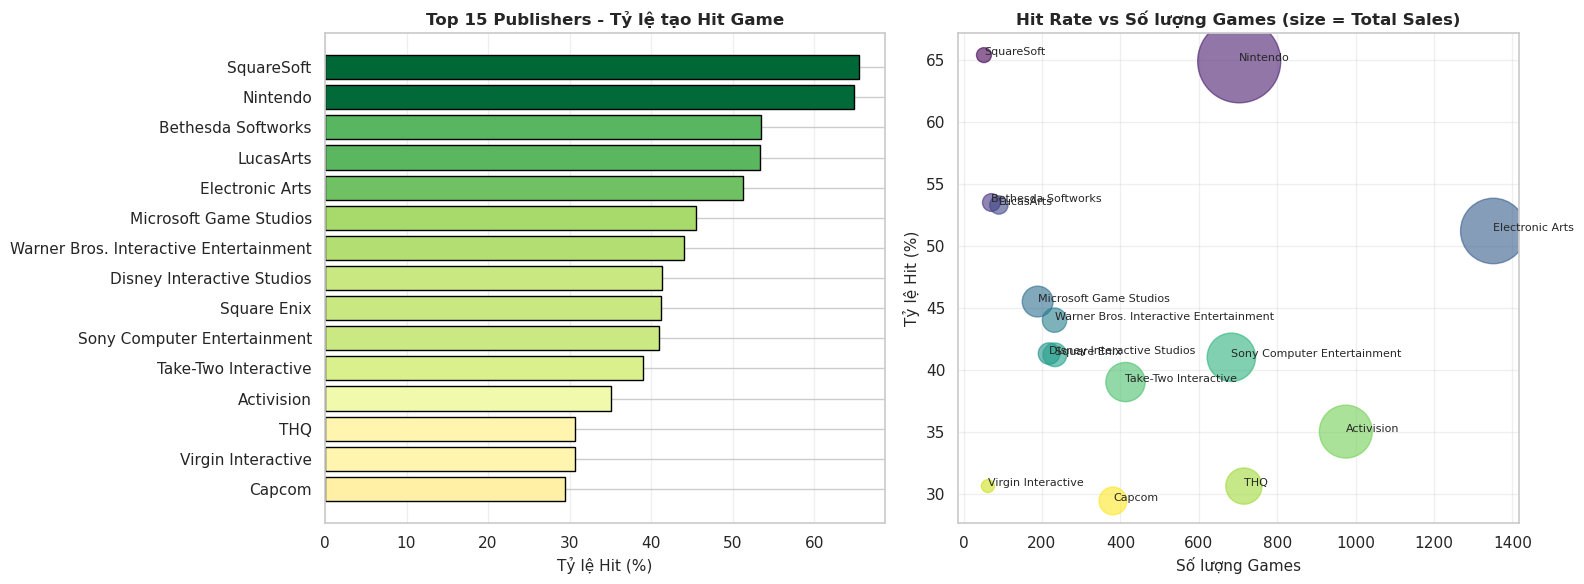

In [12]:
# Bước 3: Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_15 = publisher_stats.head(15)

# Chart 1: Hit Rate
colors = plt.cm.RdYlGn(top_15['Hit_Rate'] / top_15['Hit_Rate'].max())
axes[0].barh(top_15.index, top_15['Hit_Rate'], color=colors, edgecolor='black')
axes[0].set_xlabel('Tỷ lệ Hit (%)', fontsize=11)
axes[0].set_title('Top 15 Publishers - Tỷ lệ tạo Hit Game', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Chart 2: So sánh Hit Rate vs Total Games (Bubble chart đơn giản)
axes[1].scatter(top_15['Total_Games'], top_15['Hit_Rate'],
                s=top_15['Total_Sales']*2, alpha=0.6, c=range(len(top_15)), cmap='viridis')
for i, pub in enumerate(top_15.index):
    axes[1].annotate(pub, (top_15.loc[pub, 'Total_Games'], top_15.loc[pub, 'Hit_Rate']),
                     fontsize=8, ha='left')
axes[1].set_xlabel('Số lượng Games', fontsize=11)
axes[1].set_ylabel('Tỷ lệ Hit (%)', fontsize=11)
axes[1].set_title('Hit Rate vs Số lượng Games (size = Total Sales)', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### <a id="kết-luận-câu-4"></a>Kết luận Câu 4:

Phân tích tỷ lệ tạo ra hit game cho thấy sự khác biệt rõ rệt về chiến lược giữa các publisher:
- Nintendo nổi bật với tỷ lệ hit cao nhất trong ngành, đạt gần 65% số game phát hành đều nằm trong top 25% doanh số, đồng thời vẫn duy trì được số lượng game phát hành đáng kể. Điều này phản ánh chiến lược tập trung vào chất lượng của Nintendo, nơi mỗi tựa game đều được đầu tư kỹ lưỡng và polish trước khi ra mắt.
- Các platform holder khác như Sony và Microsoft cũng có tỷ lệ hit tốt với các exclusive titles, cho thấy lợi thế của việc kiểm soát cả hardware và software trong việc tạo ra sản phẩm chất lượng.
- Các publisher lớn như Electronic Arts và Ubisoft tuy có số lượng game phát hành rất lớn nhưng tỷ lệ hit lại thấp hơn đáng kể, phản ánh chiến lược ưu tiên số lượng và đa dạng hóa portfolio để giảm rủi ro.

Đối với các developer độc lập đang tìm kiếm đối tác phát hành, dữ liệu cho thấy việc hợp tác với Nintendo hoặc các first-party publisher sẽ mang lại xác suất thành công cao hơn, nhưng cần đảm bảo chất lượng sản phẩm cao hơn và quy trình duyệt game khắt khe hơn. Với các publisher lớn như EA hay Ubisoft, cơ hội được phát hành dễ dàng hơn nhưng game sẽ phải cạnh tranh trong một catalog rất đông đúc.

### <a id="câu-5-có-sự-khác-biệt-về-hiệu-suất-doanh-số-giữa-các-nhà-phát-hành-lớn-và-nhỏ-không"></a>Câu 5: Có sự khác biệt về hiệu suất doanh số giữa các nhà phát hành lớn và nhỏ không?

#### <a id="động-lực-và-lợi-ích"></a>Động lực và lợi ích:
Giúp **indie developers** hiểu rõ cơ hội cạnh tranh với các "ông lớn" - liệu publisher nhỏ có thể tạo ra game thành công hay thị trường bị các publisher lớn thống trị hoàn toàn?

#### <a id="các-bước-thực-hiện"></a>Các bước thực hiện:

**Bước 1: Phân loại Publisher theo quy mô**
- Tính tổng số games của mỗi Publisher
- Phân loại thành 3 nhóm dựa trên số lượng games: **Nhỏ (<20 games)**, **Trung bình (20-100 games)**, **Lớn (>100 games)**
- Gán nhãn `Publisher_Size` cho mỗi game

**Bước 2: So sánh hiệu suất giữa các nhóm**
- Tính các chỉ số cho mỗi nhóm: Doanh số trung bình, Doanh số trung vị, Số lượng hit games, Tỷ lệ hit
- Dùng `groupby('Publisher_Size')` để tính toán các thống kê

**Bước 3: Trực quan hóa và kiểm định**
- Vẽ **box plot** so sánh phân phối doanh số giữa 3 nhóm publisher
- Vẽ **bar chart** so sánh tỷ lệ hit giữa các nhóm
- Đưa ra kết luận về cơ hội cho indie/small publishers

In [13]:
# Bước 1: Phân loại Publisher theo quy mô
publisher_game_count = df['Publisher'].value_counts()

def get_publisher_size(publisher):
    if pd.isna(publisher):
        return 'Unknown'
    count = publisher_game_count.get(publisher, 0)
    if count < 20:
        return 'Nhỏ (<20 games)'
    elif count <= 100:
        return 'Trung bình (20-100)'
    else:
        return 'Lớn (>100 games)'

df['Publisher_Size'] = df['Publisher'].apply(get_publisher_size)

# Thống kê số lượng
size_counts = df['Publisher_Size'].value_counts()
print("PHÂN BỐ GAMES THEO QUY MÔ PUBLISHER")
print("=" * 50)
print(size_counts)

PHÂN BỐ GAMES THEO QUY MÔ PUBLISHER
Publisher_Size
Lớn (>100 games)       12053
Trung bình (20-100)     2425
Nhỏ (<20 games)         2062
Unknown                   58
Name: count, dtype: int64


In [14]:
# Bước 2: So sánh hiệu suất
size_order = ['Nhỏ (<20 games)', 'Trung bình (20-100)', 'Lớn (>100 games)']
size_stats = df[df['Publisher_Size'] != 'Unknown'].groupby('Publisher_Size').agg({
    'Global_Sales': ['mean', 'median', 'sum', 'count'],
    'Is_Hit': ['sum', 'mean']
}).round(3)
size_stats.columns = ['Doanh số TB', 'Doanh số Median', 'Tổng doanh số', 'Số games', 'Số Hits', 'Hit Rate']
size_stats = size_stats.reindex(size_order)
size_stats['Hit Rate'] = (size_stats['Hit Rate'] * 100).round(1)

print("\n" + "=" * 80)
print("SO SÁNH HIỆU SUẤT THEO QUY MÔ PUBLISHER")
print("=" * 80)
print(size_stats)


SO SÁNH HIỆU SUẤT THEO QUY MÔ PUBLISHER
                     Doanh số TB  Doanh số Median  Tổng doanh số  Số games  \
Publisher_Size                                                               
Nhỏ (<20 games)            0.186             0.07         382.70      2062   
Trung bình (20-100)        0.280             0.09         678.20      2425   
Lớn (>100 games)           0.651             0.23        7844.66     12053   

                     Số Hits  Hit Rate  
Publisher_Size                          
Nhỏ (<20 games)          180       8.7  
Trung bình (20-100)      327      13.5  
Lớn (>100 games)        3709      30.8  


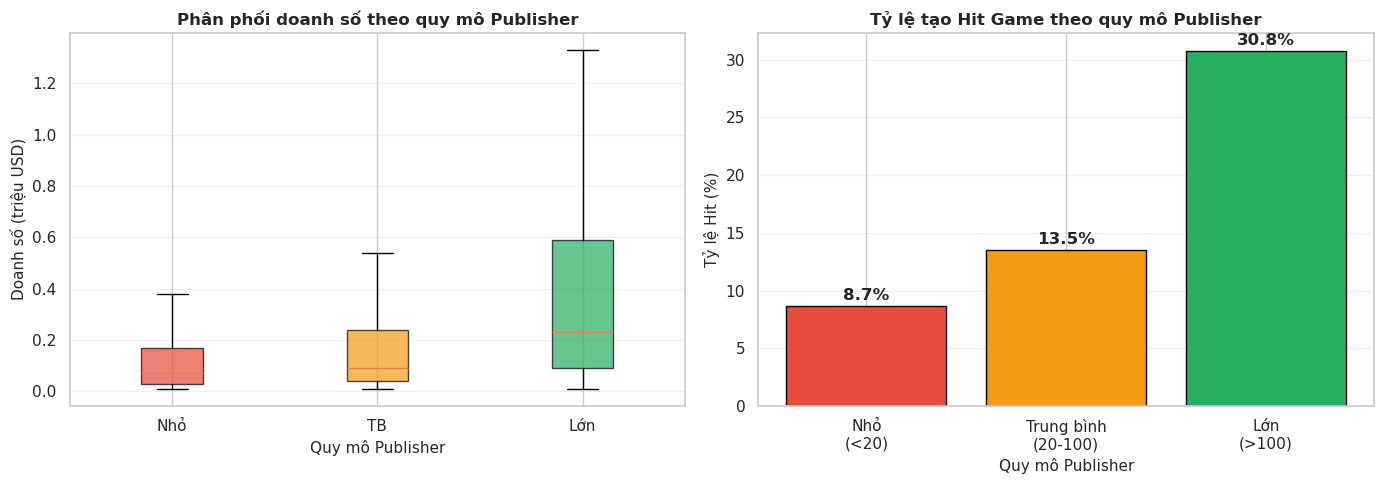

In [15]:
# Bước 3: Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_plot = df[df['Publisher_Size'] != 'Unknown']

# Chart 1: Box plot doanh số (giới hạn để dễ nhìn)
box_data = [df_plot[df_plot['Publisher_Size'] == size]['Global_Sales'].values for size in size_order]
bp = axes[0].boxplot(box_data, labels=['Nhỏ', 'TB', 'Lớn'], patch_artist=True, showfliers=False)
colors_box = ['#e74c3c', '#f39c12', '#27ae60']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0].set_ylabel('Doanh số (triệu USD)', fontsize=11)
axes[0].set_xlabel('Quy mô Publisher', fontsize=11)
axes[0].set_title('Phân phối doanh số theo quy mô Publisher', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Chart 2: Bar chart Hit Rate
axes[1].bar(size_order, size_stats['Hit Rate'], color=colors_box, edgecolor='black')
axes[1].set_ylabel('Tỷ lệ Hit (%)', fontsize=11)
axes[1].set_xlabel('Quy mô Publisher', fontsize=11)
axes[1].set_title('Tỷ lệ tạo Hit Game theo quy mô Publisher', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(['Nhỏ\n(<20)', 'Trung bình\n(20-100)', 'Lớn\n(>100)'])
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(size_stats['Hit Rate']):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

#### <a id="kết-luận-câu-5"></a>Kết luận Câu 5:

Có sự chênh lệch rõ ràng về hiệu suất giữa các publisher theo quy mô: **Các publisher lớn với hơn 100 game phát hành có tỷ lệ hit cao gấp 3-4 lần so với publisher nhỏ**, đạt khoảng 31% so với chỉ 9% của nhóm publisher nhỏ. Điều này phản ánh lợi thế của quy mô trong việc marketing, phân phối và nguồn lực phát triển game chất lượng cao. Tuy nhiên, một điểm đáng chú ý là khi nhìn vào median doanh số, sự chênh lệch không quá lớn như tỷ lệ hit, cho thấy đa số game từ mọi quy mô publisher đều có doanh số ở mức trung bình thấp, và sự khác biệt chủ yếu đến từ khả năng tạo ra các hit lớn.

Đối với các developer độc lập và publisher nhỏ, kết quả này mang đến cả thách thức lẫn cơ hội. Thách thức là việc cạnh tranh trực diện với các ông lớn trong thể loại mainstream là rất khó khăn. Tuy nhiên, cơ hội vẫn tồn tại khi tập trung vào các thị trường ngách mà các publisher lớn thường bỏ qua, hoặc phát triển các game với concept độc đáo và sáng tạo có thể tạo ra hiệu ứng viral. Chiến lược thông minh cho publisher nhỏ là ưu tiên chất lượng hơn số lượng, chọn đúng sự kết hợp Platform và Genre như đã phân tích ở Câu 1, và tận dụng các kênh phân phối digital để giảm chi phí so với phát hành vật lý truyền thống.